# Imports

In [3]:
import sys
sys.path.append("../src")

# Librairies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# SKlearn
from sklearn.tree import DecisionTreeClassifier 
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Matplotlib
import matplotlib.pyplot as plt

# Constants

In [4]:
train_path = "../data/selected_train.csv"
train_not_norm_path = "../data/train_not_normalized.csv"

# Loading data

In [5]:
take_normalized_data = True

In [6]:
def preprocessing_data(data):
    scaler = StandardScaler()
    scaler.fit(data)
    return scaler.transform(data)

In [7]:
if take_normalized_data:
    # Already preprocessed data
    df_data = pd.read_csv(train_path, sep=",")
    X = df_data[df_data.columns.difference(['label'])].values
    
else:
    # Load data not preprocessed and preprocess it
    df_data = pd.read_csv(train_not_norm_path, sep=",")
    X = df_data[df_data.columns.difference(['label'])].values
    X = preprocessing_data(X)

y = df_data["label"].values

# Testing Decision Trees

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
clf    = DecisionTreeClassifier().fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy=", accuracy_score(y_test, y_pred))

Accuracy= 0.8333333333333334


In [11]:
num_splits = 100 
accs = []
list_K = list(range(2, 20))

for K in list_K:
    
    acc_tot    = 0.0
    for split_num in range(num_splits):
        # Split train test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

        # PCA on train
        pca = PCA(n_components=K)
        pcs_train = pca.fit_transform(X_train)
        pcs_test = pca.transform(X_test)

        # Clf KNN
        clf = DecisionTreeClassifier()
        clf.fit(pcs_train, y_train)

        # Make predictions
        y_preds = clf.predict(pcs_test)
        acc_tot += accuracy_score(y_test, y_preds)

    acc = acc_tot/num_splits
    #print("K={} | Accuracy={}".format(K, acc))
    accs.append(acc)

best_idx = np.argmax(accs)
best_K   = best_idx+list_K[0]
best_acc = accs[best_idx]
print("Best accuracy for K={}, Acc={}".format(best_K, best_acc))

Best accuracy for K=4, Acc=0.7666666666666668


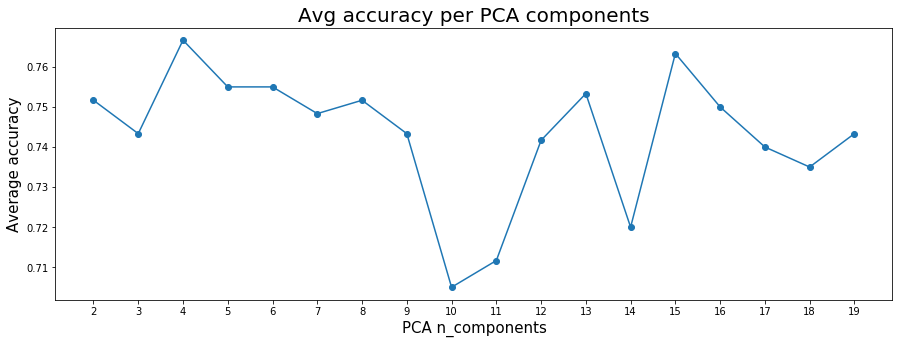

In [12]:
plt.figure(figsize=(15, 5))
plt.plot(list_K, accs, "-o")
plt.title("Avg accuracy per PCA components", fontsize=20)
plt.xticks(list_K)
plt.xlabel("PCA n_components", fontsize=15)
plt.ylabel("Average accuracy", fontsize=15)
plt.show()